In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = '/content/drive/My Drive/MyFolder/cleaned_data.csv'
data = pd.read_csv(path)

In [ ]:
data.shape

(630, 17)

In [ ]:
data.dtypes

Unnamed: 0                     int64
job_title                     object
switch_carrer                  int64
industry                      object
salary_satisfaction          float64
life_balance_satisfaction    float64
coworker_satisfaction        float64
management_satisfaction      float64
upward_satisfaction          float64
difficulty_feeling             int64
sex                            int64
age                            int64
country                       object
education_level               object
ethnicity                     object
yearly_salary_range           object
yearly_salary_average          int64
dtype: object

In [ ]:
data.head(5)

,Unnamed: 0,job_title,switch_carrer,industry,salary_satisfaction,life_balance_satisfaction,coworker_satisfaction,management_satisfaction,upward_satisfaction,difficulty_feeling,sex,age,country,education_level,ethnicity,yearly_salary_range,yearly_salary_average
0,0,Data Analyst,1,Healthcare,9.0,9.0,7.0,5.0,5.0,5,1,26,United States,NaN,White or Caucasian,106k-125k,115
1,1,Data Analyst,0,Finance,1.0,2.0,5.0,2.0,1.0,5,1,36,Canada,NaN,Asian or Asian American,41k-65k,53
2,2,Data Engineer,0,Other,0.0,8.0,7.0,5.0,7.0,2,1,23,Other,NaN,Black or African American,0-40k,20
3,3,Other,1,Finance,10.0,6.0,7.0,10.0,7.0,1,0,35,Canada,NaN,White or Caucasian,150k-225k,187
4,4,Data Analyst,1,Healthcare,1.0,4.0,4.0,4.0,0.0,4,1,44,United States,NaN,Black or African American,41k-65k,53


In [ ]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
data.columns

Index(['job_title', 'switch_carrer', 'industry', 'salary_satisfaction',
       'life_balance_satisfaction', 'coworker_satisfaction',
       'management_satisfaction', 'upward_satisfaction', 'difficulty_feeling',
       'sex', 'age', 'country', 'education_level', 'ethnicity',
       'yearly_salary_range', 'yearly_salary_average'],
      dtype='object')

# Do Some Exploratory

In [ ]:
data['job_title'].value_counts()

Data Analyst          381
Other                 164
Data Engineer          38
Data Scientist         27
Business Analyst       12
Database Developer      5
Data Architect          3
Name: job_title, dtype: int64

In [ ]:
# create individual frames for each job title
da_data = data[data['job_title']=='Data Analyst']
de_data = data[data['job_title']=='Data Engineer']
ds_data = data[data['job_title']=='Data Scientist']

## Explore Data Analyst records

In [ ]:
da_data['switch_carrer'].value_counts()

1    246
0    135
Name: switch_carrer, dtype: int64

In [ ]:
da_data['industry'].value_counts()

Other                119
Tech                  86
Healthcare            65
Finance               61
Education             19
Telecommunication     13
Construction           6
Real Estate            6
Agriculture            6
Name: industry, dtype: int64

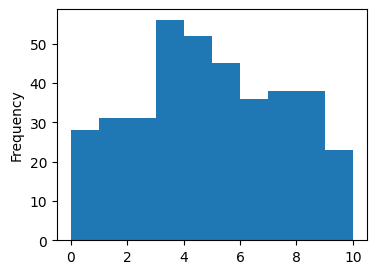

In [ ]:
da_data['salary_satisfaction'].plot.hist(figsize=(4, 3))
plt.show()

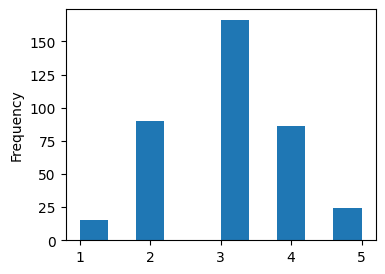

In [ ]:
da_data['difficulty_feeling'].plot.hist(figsize=(4, 3))
plt.show()

In [ ]:
da_data['sex'].value_counts()

1    280
0    101
Name: sex, dtype: int64

In [ ]:
print(set(da_data['age']))

{19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 50, 53, 54, 55, 56}


In [ ]:
da_data['yearly_salary_range'].value_counts()

0-40k        143
41k-65k       97
66k-85k       74
86k-105k      35
106k-125k     21
125k-150k      7
150k-225k      4
Name: yearly_salary_range, dtype: int64

In [ ]:
salary_age_corr = da_data.groupby(['yearly_salary_range'])['age'].mean()

In [ ]:
salary_age_corr.index

Index(['0-40k', '106k-125k', '125k-150k', '150k-225k', '41k-65k', '66k-85k',
       '86k-105k'],
      dtype='object', name='yearly_salary_range')

In [ ]:
salary_age_corr = salary_age_corr.iloc[[0, 4, 5, 6, 1, 2, 3]]

<Axes: xlabel='yearly_salary_range'>

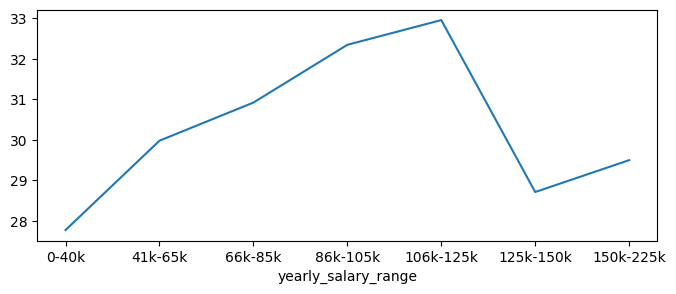

In [ ]:
salary_age_corr.plot(figsize=(8, 3))

In [ ]:
da_data.groupby(['difficulty_feeling'])['age'].agg([min, max, np.mean])

,min,max,mean
difficulty_feeling,,,
1,22,54,31.933333
2,21,56,29.833333
3,19,50,29.379518
4,21,55,29.732558
5,23,42,29.708333


In [ ]:
pd.crosstab(da_data['difficulty_feeling'], da_data['switch_carrer'])

switch_carrer,0,1
difficulty_feeling,,
1,4,11
2,37,53
3,67,99
4,21,65
5,6,18


## Explore Data Engineer records

In [ ]:
de_data['switch_carrer'].value_counts()

1    22
0    16
Name: switch_carrer, dtype: int64

In [ ]:
de_data['industry'].value_counts()

Tech            14
Other           10
Finance          4
Healthcare       4
Real Estate      4
Construction     1
Education        1
Name: industry, dtype: int64

In [ ]:
de_data['sex'].value_counts()

1    34
0     4
Name: sex, dtype: int64

In [ ]:
de_data['difficulty_feeling'].value_counts()

3    20
2     9
4     7
1     2
Name: difficulty_feeling, dtype: int64

In [ ]:
set(de_data['age'])

{21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 33, 35, 36, 37, 38, 40, 43, 45}

In [ ]:
salary_age_corr = de_data.groupby(['yearly_salary_range'])['age'].mean()
salary_age_corr.index

Index(['0-40k', '106k-125k', '125k-150k', '150k-225k', '225k+', '41k-65k',
       '66k-85k', '86k-105k'],
      dtype='object', name='yearly_salary_range')

In [ ]:
salary_age_corr = salary_age_corr.iloc[[0, 5, 6, 7, 1, 2, 3, 4]]

<Axes: xlabel='yearly_salary_range'>

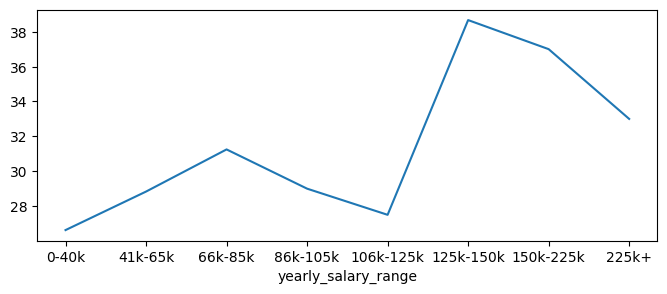

In [ ]:
salary_age_corr.plot(figsize=(8, 3))

<Axes: >

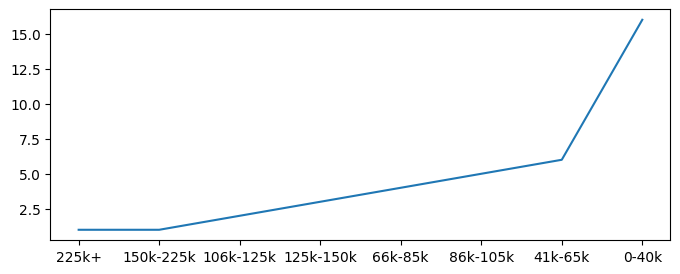

In [ ]:
de_data['yearly_salary_range'].value_counts().sort_values().plot(figsize=(8, 3))

## Explore Data Scientist records

In [ ]:
ds_data['sex'].value_counts()

1    24
0     3
Name: sex, dtype: int64

In [ ]:
ds_data['education_level'].value_counts(dropna=False)

Bachelors     14
Masters        8
NaN            2
PhD            2
Associates     1
Name: education_level, dtype: int64

In [ ]:
da_data['education_level'].value_counts(dropna=False)

Bachelors      203
Masters        116
NaN             32
High School     21
Associates       7
PhD              2
Name: education_level, dtype: int64

In [ ]:
de_data['education_level'].value_counts(dropna=False)

Bachelors      22
Masters        11
NaN             3
High School     1
Associates      1
Name: education_level, dtype: int64

In [ ]:
ds_data['industry'].value_counts()

Finance              8
Other                7
Tech                 6
Education            2
Healthcare           2
Telecommunication    1
Real Estate          1
Name: industry, dtype: int64

In [ ]:
ds_data['switch_carrer'].value_counts()

1    19
0     8
Name: switch_carrer, dtype: int64

In [ ]:
ds_data['difficulty_feeling'].value_counts()

4    11
3    10
2     5
1     1
Name: difficulty_feeling, dtype: int64

In [ ]:
ds_data['yearly_salary_range'].value_counts()

0-40k        8
125k-150k    5
86k-105k     4
41k-65k      4
150k-225k    3
106k-125k    2
225k+        1
Name: yearly_salary_range, dtype: int64

In [ ]:
salary_age_corr = ds_data.groupby(['yearly_salary_range'])['age'].mean()
salary_age_corr.index

Index(['0-40k', '106k-125k', '125k-150k', '150k-225k', '225k+', '41k-65k',
       '86k-105k'],
      dtype='object', name='yearly_salary_range')

In [ ]:
salary_age_corr = salary_age_corr.iloc[[0, 5, 6, 1, 2, 3, 4]]

<Axes: xlabel='yearly_salary_range'>

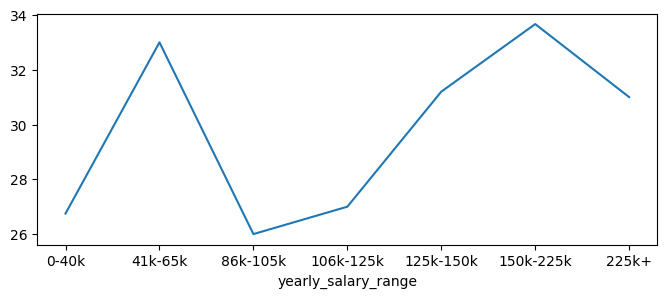

In [ ]:
salary_age_corr.plot(figsize=(8, 3))

## Analysis on Total data

In [ ]:
pd.crosstab(da_data['yearly_salary_range'], da_data['switch_carrer'])

switch_carrer,0,1
yearly_salary_range,,
0-40k,51,92
106k-125k,5,16
125k-150k,4,3
150k-225k,2,2
41k-65k,38,59
66k-85k,21,53
86k-105k,14,21


In [ ]:
pd.crosstab(de_data['yearly_salary_range'], de_data['switch_carrer'])

switch_carrer,0,1
yearly_salary_range,,
0-40k,7,9
106k-125k,1,1
125k-150k,1,2
150k-225k,1,0
225k+,0,1
41k-65k,2,4
66k-85k,2,2
86k-105k,2,3


In [ ]:
pd.crosstab(ds_data['yearly_salary_range'], ds_data['switch_carrer'])

switch_carrer,0,1
yearly_salary_range,,
0-40k,3,5
106k-125k,0,2
125k-150k,0,5
150k-225k,1,2
225k+,0,1
41k-65k,2,2
86k-105k,2,2


In [ ]:
data['switch_carrer'].value_counts()

1    372
0    258
Name: switch_carrer, dtype: int64

In [ ]:
core_data = data[data['job_title'].isin(['Data Analyst', 'Data Engineer', 'Data Scientist'])]
cross_tab = pd.crosstab(core_data['job_title'], core_data['yearly_salary_range'])
cross_tab

yearly_salary_range,0-40k,106k-125k,125k-150k,150k-225k,225k+,41k-65k,66k-85k,86k-105k
job_title,,,,,,,,
Data Analyst,143,21,7,4,0,97,74,35
Data Engineer,16,2,3,1,1,6,4,5
Data Scientist,8,2,5,3,1,4,0,4


In [ ]:
cross_tab.loc['Data Analyst'] = cross_tab.loc['Data Analyst'] / sum(cross_tab.loc['Data Analyst'])
cross_tab.loc['Data Engineer'] = cross_tab.loc['Data Engineer'] / sum(cross_tab.loc['Data Engineer'])
cross_tab.loc['Data Scientist'] = cross_tab.loc['Data Scientist'] / sum(cross_tab.loc['Data Scientist'])
cross_tab

yearly_salary_range,0-40k,106k-125k,125k-150k,150k-225k,225k+,41k-65k,66k-85k,86k-105k
job_title,,,,,,,,
Data Analyst,0.375328,0.055118,0.018373,0.010499,0.000000,0.254593,0.194226,0.091864
Data Engineer,0.421053,0.052632,0.078947,0.026316,0.026316,0.157895,0.105263,0.131579
Data Scientist,0.296296,0.074074,0.185185,0.111111,0.037037,0.148148,0.000000,0.148148


<Axes: xlabel='life_balance_satisfaction'>

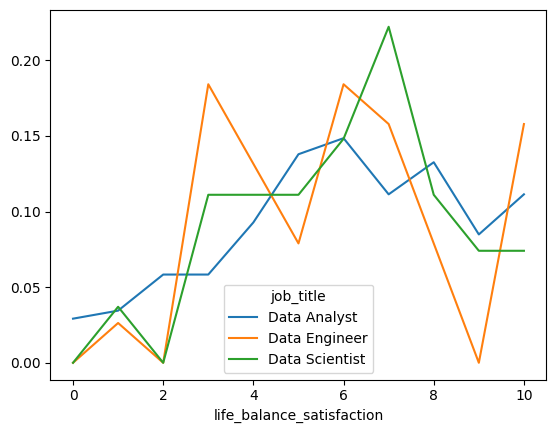

In [ ]:
cross_tab = pd.crosstab(core_data['job_title'], core_data['life_balance_satisfaction'])
cross_tab.loc['Data Analyst'] = cross_tab.loc['Data Analyst'] / sum(cross_tab.loc['Data Analyst'])
cross_tab.loc['Data Engineer'] = cross_tab.loc['Data Engineer'] / sum(cross_tab.loc['Data Engineer'])
cross_tab.loc['Data Scientist'] = cross_tab.loc['Data Scientist'] / sum(cross_tab.loc['Data Scientist'])
cross_tab.T.plot()

In [ ]:
data.groupby('life_balance_satisfaction')['age'].agg([min, max, np.mean])

,min,max,mean
life_balance_satisfaction,,,
0.0,20,42,27.892857
1.0,22,53,31.692308
2.0,21,42,27.735294
3.0,20,48,29.916667
4.0,22,55,29.767857
5.0,21,66,30.294118
6.0,19,92,29.909091
7.0,21,54,29.847222
8.0,22,52,31.225352


In [ ]:
pd.crosstab(data['sex'], data['life_balance_satisfaction'])

life_balance_satisfaction,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
sex,,,,,,,,,,,
0,11,8,9,9,9,27,23,18,13,8,23
1,17,18,25,39,47,58,65,54,58,39,42
